**IMPORTING THE RELEVANT PACKAGES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

**IMPORTING THE DATASET**

In [2]:
Credit_card_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

**EXPLORING THE DATASET**

In [3]:
Credit_card_data.head()

# printing the first five rows of the dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Credit_card_data.tail()

# printing last five rows of the dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
Credit_card_data.shape

# printing the no. of rows and columns

(284807, 31)

In [6]:
Credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
Credit_card_data.isnull().sum()
 
# printing the null values
# we can see there is no null values in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# checking duplicate rows in the dataset

duplicate_rows = Credit_card_data[Credit_card_data.duplicated()]
duplicate_rows.shape

(1081, 31)

In [9]:
Credit_card_data = Credit_card_data.drop_duplicates()
Credit_card_data.shape

# removing the duplicate rows 

(283726, 31)

In [10]:
Credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
Credit_card_data['Class'].value_counts()

# the number of fraud transaction is very less as compared to legit transactions

0    283253
1       473
Name: Class, dtype: int64

In [12]:
print('Legit Transactions: ', round(Credit_card_data['Class'].value_counts()[0]/len(Credit_card_data) * 100,2),'%')
print('Fraud Transactions: ', round(Credit_card_data['Class'].value_counts()[1]/len(Credit_card_data) * 100,2),'%')

Legit Transactions:  99.83 %
Fraud Transactions:  0.17 %


Text(0.5, 1.0, 'Class Distributions \n (0: Legit, 1: Fraud)')

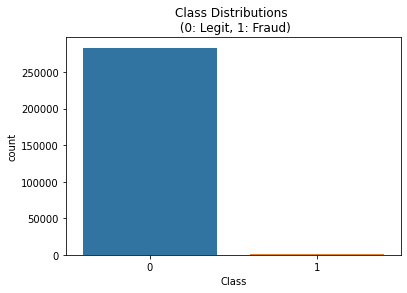

In [13]:
sns.countplot('Class', data = Credit_card_data)
plt.title('Class Distributions \n (0: Legit, 1: Fraud)')

In [14]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

Credit_card_data['Scaled Amount'] = rob_scaler.fit_transform(Credit_card_data['Amount'].values.reshape(-1,1))
Credit_card_data.drop(['Amount'], axis=1, inplace=True)

# since most of our data has already been scaled we should scale the columns that are left to scale(Amount) 

In [15]:
Scaled_Amount = Credit_card_data['Scaled Amount']
Credit_card_data.drop(['Scaled Amount'], axis=1, inplace=True)
Credit_card_data.insert(0, 'Scaled Amount', Scaled_Amount)
Credit_card_data.head()

,Scaled Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


**EXTRACTING DEPENDENT AND INDEPENDENT VARIABLES**

In [16]:
X = Credit_card_data.drop(['Time', 'Class'], axis=1)
Y = Credit_card_data['Class']

In [17]:
Credit_card_data = Credit_card_data.sample(frac=1)
Fraud_data = Credit_card_data.loc[Credit_card_data['Class'] == 1]               # extracting fraud transactions
Legit_data = Credit_card_data.loc[Credit_card_data['Class'] == 0][:473]         # amount of fraud transactions is 473

Normal_data = pd.concat([Fraud_data, Legit_data])                               # combining fraud and legit transactions
New_data = Normal_data.sample(frac=1, random_state=2)

New_data.head()                                                                 # the sub sample we want

,Scaled Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
141585,-0.292727,84407.0,-1.653451,1.107663,1.290005,-1.652429,-0.917200,-0.385353,-1.197106,-2.043484,0.327109,-1.801004,-1.344341,0.272574,-0.871401,0.198725,-1.164421,0.894792,-0.293640,-0.306717,-1.503475,0.392964,-1.155845,0.754321,0.023517,0.462760,-0.174679,1.188999,0.081967,0.118303,0
79211,2.083716,57923.0,1.204872,-1.587592,0.057333,-1.351680,-1.351148,-0.098118,-0.846032,-0.049011,-1.847820,1.446210,0.384838,-0.314497,0.310310,-0.273206,-0.809692,-0.296779,0.292443,0.415644,0.556132,0.001932,-0.285774,-0.741379,-0.149059,-0.370719,0.364267,-0.291679,0.000029,0.030898,0
70589,3.335697,53937.0,-2.042608,1.573578,-2.372652,-0.572676,-2.097353,-0.174142,-3.039520,-1.634233,-0.594809,-5.459602,2.378537,-2.330271,-0.246233,-4.058523,-0.316983,-2.522661,-5.603400,-0.778440,0.860212,0.825566,-0.723326,0.501222,-0.696892,-0.600514,0.127547,-0.786072,0.606097,0.171697,1
42473,-0.253233,41116.0,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,-5.659162,-11.298156,7.252953,-14.275092,0.188903,-14.555957,-0.338289,-12.146540,-25.162799,-9.042845,0.787579,1.384743,2.263770,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,1
91652,-0.221666,63570.0,1.115405,0.315370,1.544581,2.706483,-0.712603,0.172873,-0.478016,0.102806,-0.047477,0.460357,-0.780235,0.720104,1.082410,-0.620624,-0.417164,0.573449,-0.475650,-0.326390,-0.849683,-0.085181,-0.071114,-0.011934,0.027004,0.397624,0.331101,-0.046851,0.048696,0.038858,0


In [18]:
New_data.shape

(946, 31)

Distribution of the classes in the sub sample data
1    0.5
0    0.5
Name: Class, dtype: float64


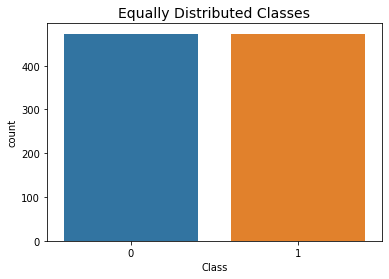

In [19]:
print('Distribution of the classes in the sub sample data')
print(New_data['Class'].value_counts()/len(New_data))

sns.countplot('Class', data = New_data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

**HEATMAP OF ACTUAL DATA**

In [20]:
Correlation = Credit_card_data.corr()

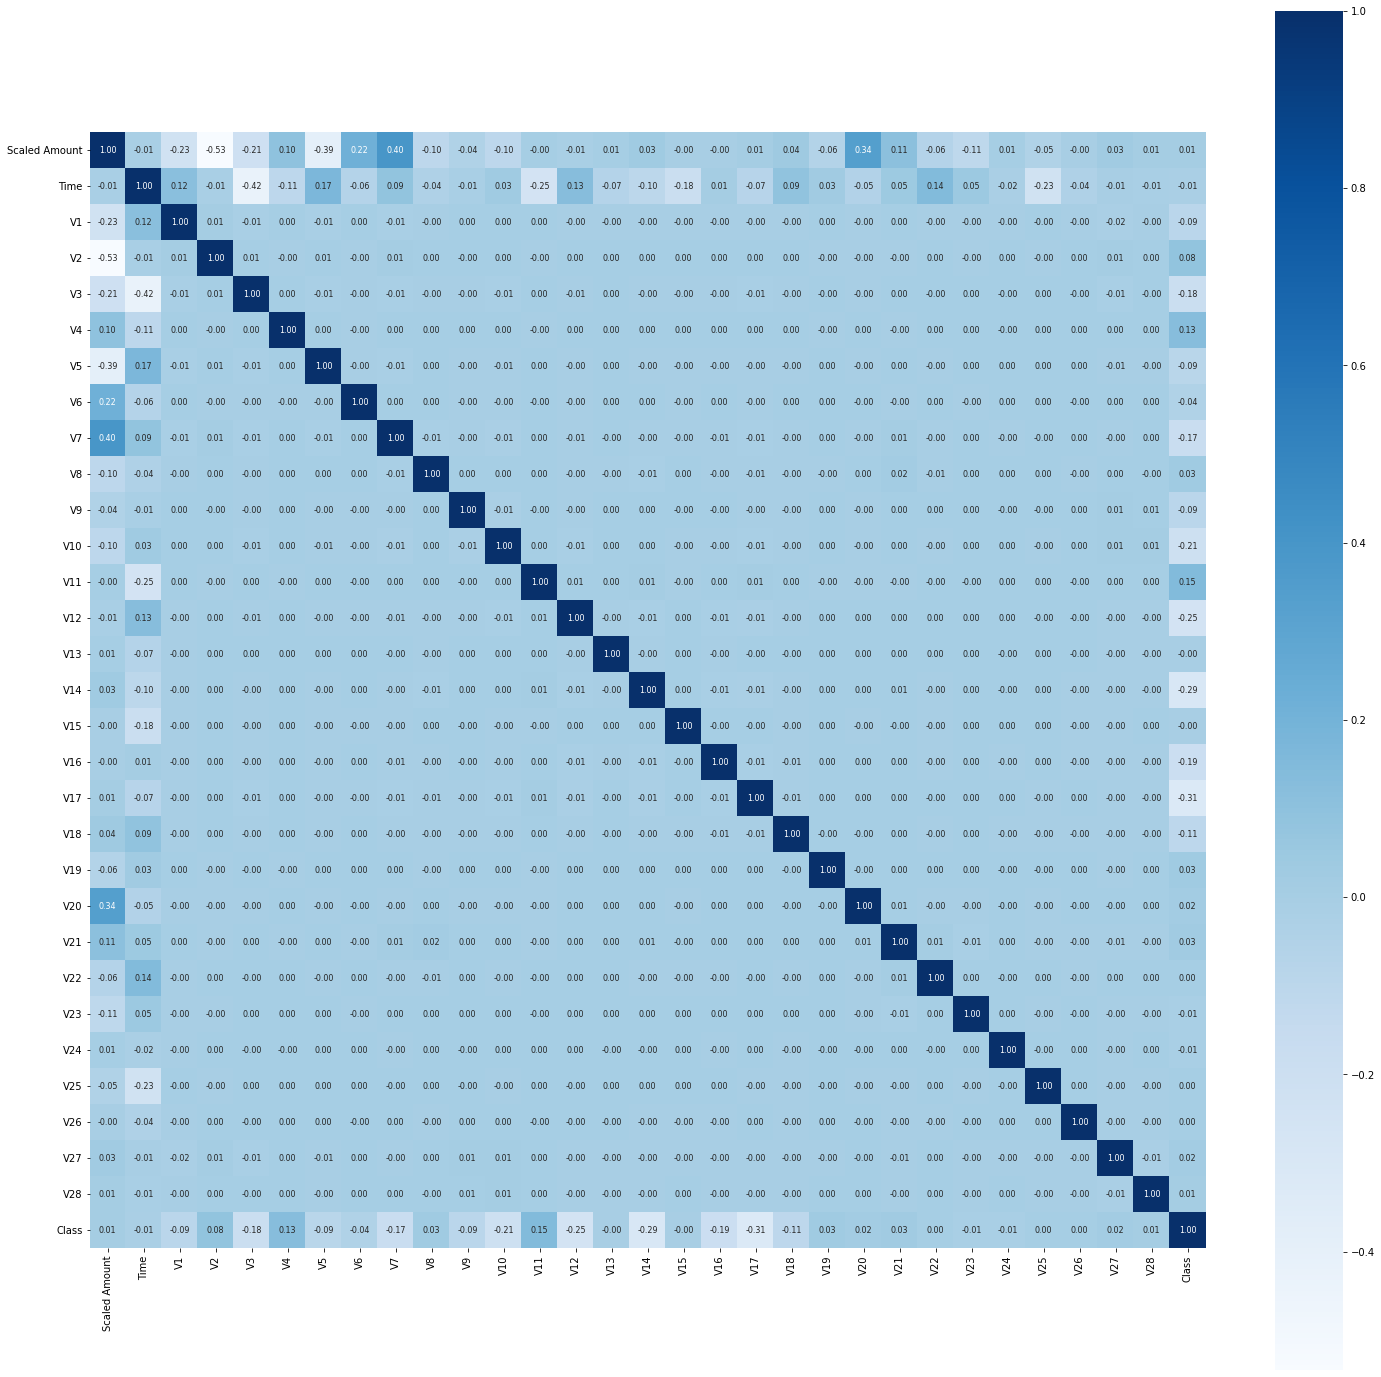

In [21]:
plt.subplots(figsize=(25,25))
sns.heatmap(Correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap= "Blues")

**HEATMAP OF SUB SAMPLE**

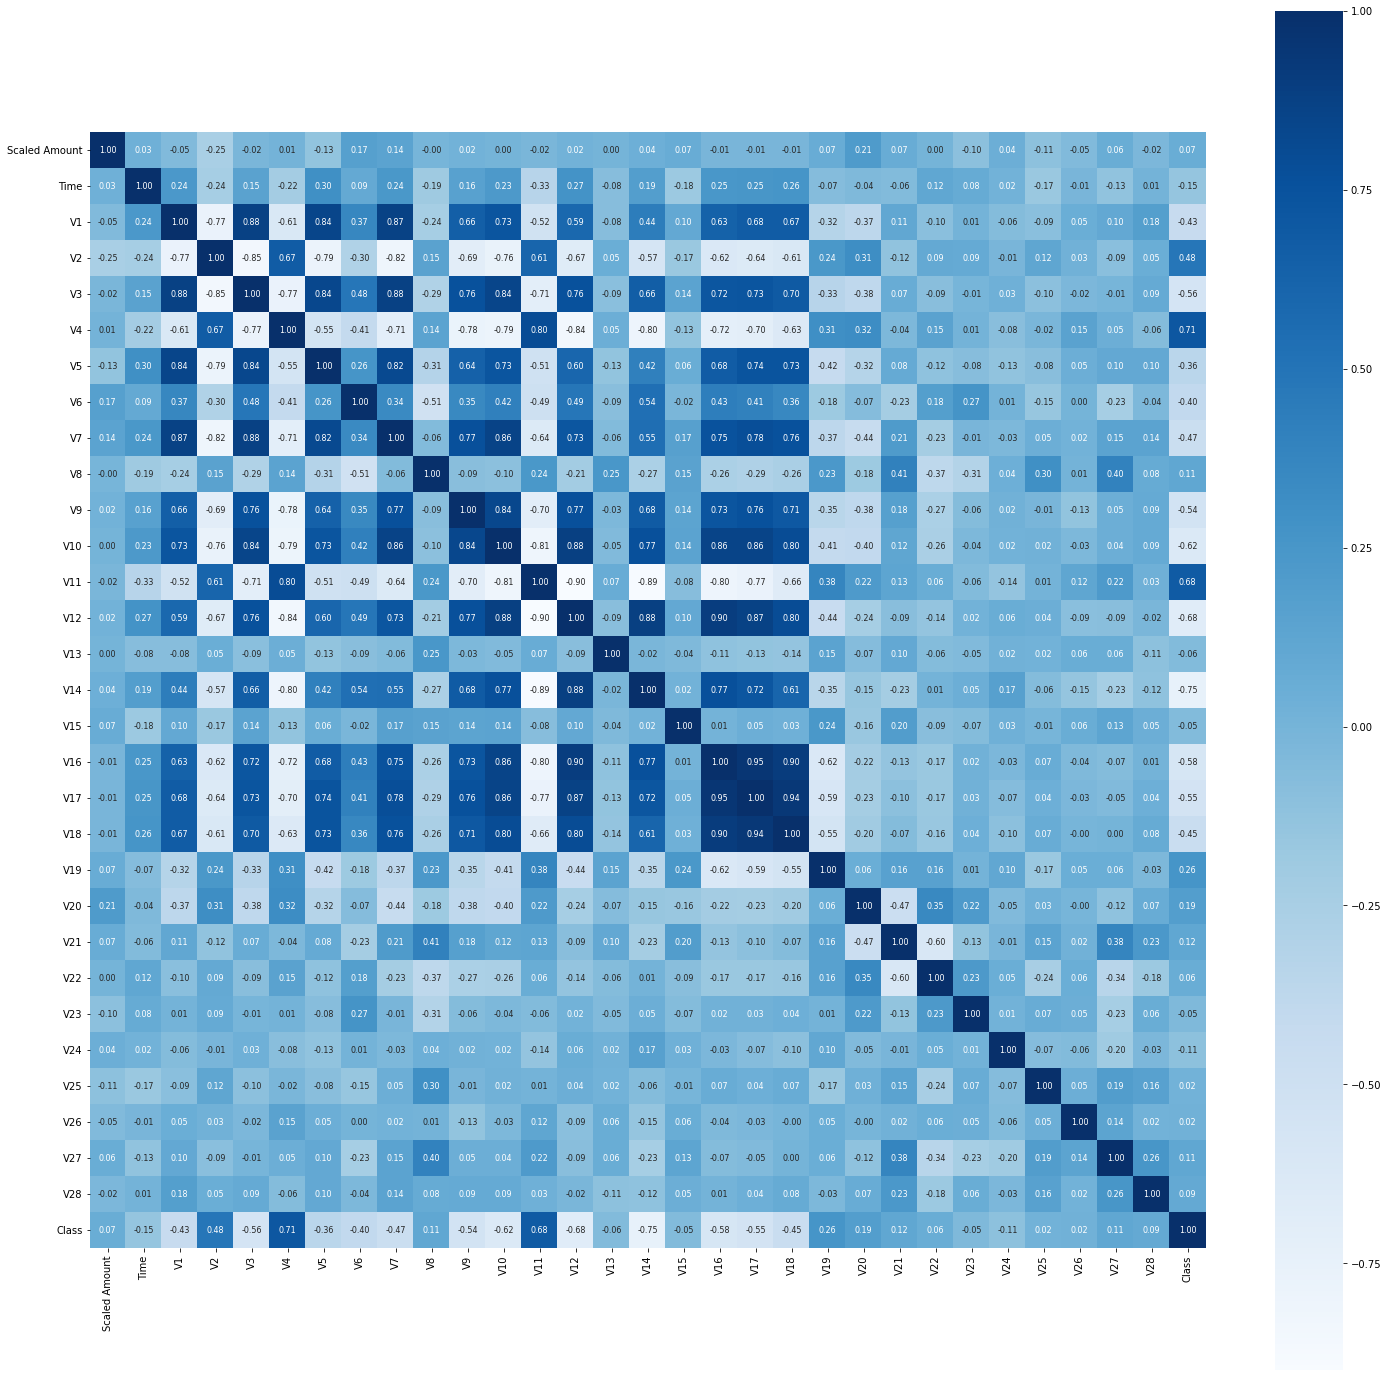

In [22]:
plt.subplots(figsize=(25,25))
sns.heatmap(New_data.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap= "Blues")

**DATA IS SPLITTED INTO TRAINING AND TEST DATA**

In [23]:
X = New_data.drop(['Time', 'Class'], axis=1)
Y = New_data['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [24]:
X_train.shape

(756, 29)

In [25]:
X_test.shape

(190, 29)

**LOGISTIC REGRESSION**

In [26]:
Model = LogisticRegression()
Model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**ACCURACY SCORE**

In [27]:
Y_Pred = Model.predict(X_test)
print('Accuracy: ',(round(accuracy_score(Y_test,Y_Pred)* 100, 2)),'%')

Accuracy:  94.21 %


**CONFUSION MATRIX**

[Text(0, 0.5, ''), Text(0, 1.5, '')]

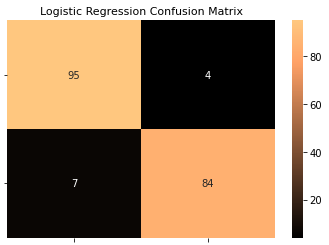

In [28]:
Logistic_reg_CF = confusion_matrix(Y_test,Y_Pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(Logistic_reg_CF, annot=True, cmap=plt.cm.copper)
ax.set_title("Logistic Regression Confusion Matrix", fontsize= 11)
ax.set_xticklabels(['', ''], fontsize= 11, rotation=90)
ax.set_yticklabels(['',''], fontsize= 11, rotation=360)

**CLASSIFICATION REPORT**

In [29]:
print(classification_report(Y_test, Y_Pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.95      0.92      0.94        91

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



**TEST CASE**

In [30]:
Test_case_values = [239.93,-2.303349568,1.75924746,-0.359744743,2.330243051,-0.821628328,-0.075787571,0.562319782,-0.399146578,-0.238253368,-1.525411627,2.032912158,-6.560124295,0.022937323,-1.470101536,-0.698826069,-2.282193829,-4.781830856,-2.615664945,-1.334441067,-0.430021867,-0.294166318,-0.932391057,0.172726296,-0.087329538,-0.156114265,-0.542627889,0.039565989,-0.153028797]
Test_case_data = pd.DataFrame(Test_case_values)
Test_case = Test_case_data.T
Test_case_pred = Model.predict(Test_case)
if(Test_case_pred == 0):
  print("LEGIT TRANSACTION")
else:
  print("FRAUD TRANSACTION")  

FRAUD TRANSACTION
